# İbrahim Hakkı HARMANKAYA Derin Öğrenme Dersi Vize Ödevi

Bu çalışmada, beş farklı pirinç türünü sınıflandırarak bir derin öğrenme modeli tasarlanmış ve uygulanmıştır.

## Çalışmada yaptığım kodlar ve sonuçlar aşağıda olduğu gibi verilmiştir.

1- Verileri Zip dosyasından dışarı çıkartma.

In [ ]:
# Zipfile modülünü içe aktarır.
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall()  # Zip dosyasının içindeki tüm dosyaları bulunduğun klasöre çıkarır.

2- Gerekli kütüphanelerin yüklenmesi.

In [ ]:
import cv2 # Görüntü işleme kütüphanesi ekler.
import pandas as pd # Veri analizi ve tablo (DataFrame) yapısı ekler.
import numpy as np # Sayısal işlemler, dizi (array) işlemleri ekler.
import os # Dosya ve klasör işlemleri için kullanılır.
import matplotlib.pyplot as plt # Görselleştirme için kullanılır.
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test olarak ayırmak için kullanılır.
from tensorflow.keras.utils import to_categorical # Sınıf etiketlerini one-hot encoding'e dönüştürmek için kullanılır.

3- Gersellerin dosyalarının yollarını alır, karşılık gelen pirinç türünü etiketler.

In [ ]:
# Veri yolunu ve classlar eklenir.
img_path = "Rice_Image_Dataset/"
labels = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

img_list = []
label_list = []

# Her bir pirinç türü için klasör oluşur.
for label in labels:
    for img_file in os.listdir(img_path + label):
        img_list.append(img_path + label + "/" + img_file)
        label_list.append(label)

df = pd.DataFrame({"img": img_list, "label": label_list})

# Pirinç türlerini sayısal etiketlere dönüştürmek için kullanılır.
d = {"Arborio": 0, "Basmati": 1, "Ipsala": 2, "Jasmine": 3, "Karacadag": 4}
df["encode_label"] = df["label"].map(d)

df = df.sample(frac=1).reset_index(drop=True)


4- Görsel verilerinin yükleyip düzenlendiği kısım.

In [ ]:
# Görselin boyutunu 32x32 yapar.
size = 32

# DataFrame'deki her bir görsel yolunu belirler.
x = []
for imge in df["img"]:
    img = cv2.imread(imge)
    img = cv2.resize(img, (size, size))
    img = img / 255.0
    x.append(img)

# Etiketler için kodlar.
x = np.array(x)
y = df['encode_label']
y = to_categorical(y, num_classes=5)


5- Görsel eğitiminin ayrımı.

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)


6- Model derlemesi yapılıyor.

In [ ]:
# Model kütüphanelerinin eklenmesi.
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Modeli sıralı (katman katman) oluşturuluyor.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 sınıf için softmax

# Modeli derleme yapılıyor.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7- Eğitim eğitiliyor.

In [ ]:
# Model eğitiliyor.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8386 - loss: 0.3930 - val_accuracy: 0.9751 - val_loss: 0.0760
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9721 - loss: 0.0866 - val_accuracy: 0.9846 - val_loss: 0.0449
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9809 - loss: 0.0619 - val_accuracy: 0.9670 - val_loss: 0.0894
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9813 - loss: 0.0586 - val_accuracy: 0.9827 - val_loss: 0.0527
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9853 - loss: 0.0478 - val_accuracy: 0.9497 - val_loss: 0.1459
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9848 - loss: 0.0470 - val_accuracy: 0.9867 - val_loss: 0.0419
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9885 - loss: 0.0378 - val_accuracy: 0.9866 - val_loss: 0.0428
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9877 - loss: 0.0372 - val_accuracy: 0

## Grafikler

1- Eğitim ve doğrulama grafiği.

In [ ]:
# Eğitim ve doğrulama doğruluğu grafiği.
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

2- Doğruluk grafiği.

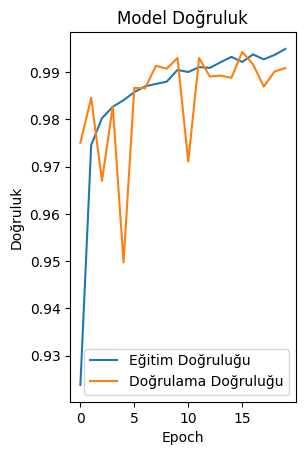

In [ ]:
# Doğruluk grafiği parametreleri girilir.
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

3- Kayıp model grafiği.

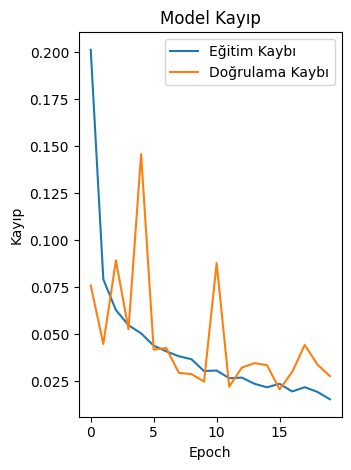

In [ ]:
# Kayıp grafiği parametreleri girilir.
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

## Sonuç

1- Tahmin testi yapılır.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
Gerçek pirinç türü adı   : Karacadag
Modelin tahmin ettiği tür: Karacadag


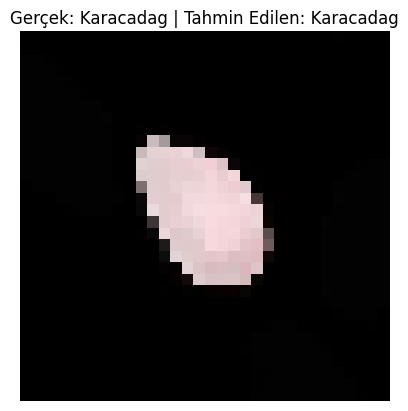

In [ ]:
# Kütüphane çağrılır.
import random

# Test verisinden rastgele fotoğraflar gelir ve tahmin yapılır.
random_index = random.randint(0, len(x_test)-1)
tahmin = model.predict(x_test[random_index:random_index+1])
gercek = np.argmax(y_test[random_index])
tahmin_edilen = np.argmax(tahmin)

# Gerçek ve tahmin edilen sınıf etiketleri yazdırılır.
print("Gerçek pirinç türü adı   :", labels[gercek])
print("Modelin tahmin ettiği tür:", labels[tahmin_edilen])

# Görüntü gösterilir ve başlık olarak tahmin vb sonuçları gösterilir.
plt.imshow(x_test[random_index])
plt.title(f"Gerçek: {labels[gercek]} | Tahmin Edilen: {labels[tahmin_edilen]}")
plt.axis("off")
plt.show()

2- Model kaydedilir.

In [ ]:
model.save("pirinc_modeli_vize.h5")